In [7]:
import pickle

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import datetime as dt
from macrosim.SeriesAccessor import SeriesAccessor

In [2]:
with open('out.pkl', 'rb') as f:
    df = pickle.load(f)
for col in df.columns[:-1]:
    df[col] = df[col].apply(lambda x: x[0])
df

,LABPART,CPI,M2,output
0,76.537197,181.046204,6050.353667,15076.584341
1,76.350412,182.449853,6104.481667,15140.123057
2,76.115839,183.006157,6179.023333,15163.345087
3,76.109420,184.311989,6261.319333,15243.912637
4,76.153300,185.653526,6318.015333,15323.706285
5,76.426129,184.471645,6410.406000,15320.220790
6,76.238407,185.712634,6488.260000,15372.901828
7,75.931535,186.083758,6562.201000,15370.421388
8,76.119762,187.596510,6651.668333,15477.412399
9,76.225194,188.969768,6738.595333,15567.781398


In [3]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY'
)
start = dt.datetime.fromisoformat('2002-01-01')
end = dt.datetime.fromisoformat('2024-12-31')

act = fred.get_series(
    series_ids=['GDPC1'],
    series_alias=['RGDP'],
    date_range=(start, end)
)

act.reset_index(inplace=True, drop=True)

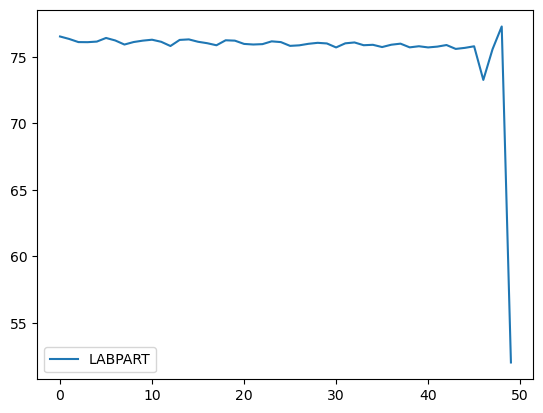

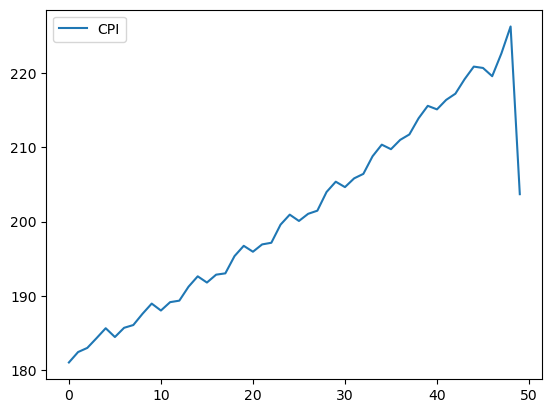

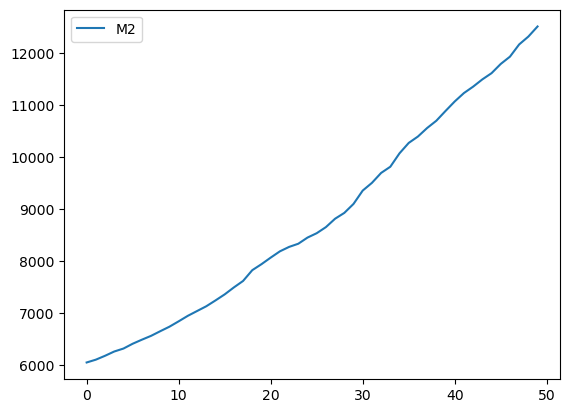

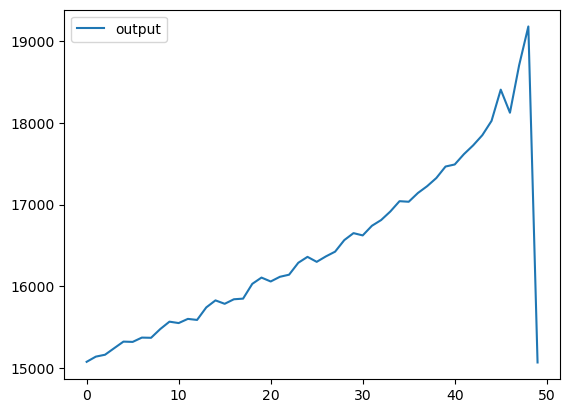

<Figure size 640x480 with 0 Axes>

In [4]:
for col in df.columns:
    plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
plt.clf()

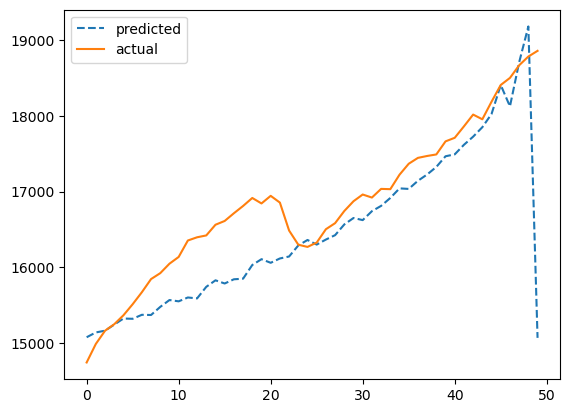

In [5]:
pred = df['output']
act = act.iloc[5:55].reset_index(drop=True)

plt.plot(pred, label='predicted', linestyle='--')
plt.plot(act, label='actual')
plt.legend()

In [8]:
r2_score(act, pred)

0.5000808611365699